# Analysis of 5 ETF Stocks in the Last 10 Years

In [1]:
#Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#List of ETF tickers
etfs = ['SPY', 'QQQ', 'IWM', 'GLD', 'EEM']

#Fetching data for each ETF and storing in a dictionary
data = {}
for etf in etfs:
    df = yf.Ticker(etf).history(period="10y")
    # Remove timezone information from the 'Date' index
    df.index = df.index.tz_localize(None)
    data[etf] = df

#Saving each ETF's data to separate sheets in an Excel file
with pd.ExcelWriter('ETFs_Historical_Data.xlsx') as writer:
    for etf, df in data.items():
        df.to_excel(writer, sheet_name=etf)


In [4]:
#Business Questions:
#1. How have the closing prices of each of the ETFs trended over the last 10 years?
#2. Which ETFs have the highest average trading volume over the past decade?
#3. Which ETF has provided the highest return on investment (ROI) over the past 10 years?
#4. Which ETF has been the most volatile over the past decade, based on the difference between the High and Low prices?
#5. Which ETF has distributed the highest dividends over the past decade?
#6. How do the ETFs compare in terms of their yearly average closing prices?
#7. On which dates did each ETF experience the largest single-day drops in closing prices?

In [2]:
#Read ETFs data from the Excel file created
file_path = 'ETFs_Historical_Data.xlsx'
etfs = ['SPY', 'QQQ', 'IWM', 'GLD', 'EEM']
data = {etf: pd.read_excel(file_path, sheet_name=etf) for etf in etfs}

In [6]:
#Check missing values for each ETF dataset
for etf, df in data.items():
    print(f"Missing values for {etf}:")
    print(df.isnull().sum())
    print("-" * 40)

Missing values for SPY:
Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64
----------------------------------------
Missing values for QQQ:
Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64
----------------------------------------
Missing values for IWM:
Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64
----------------------------------------
Missing values for GLD:
Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64
----------------------------------------
Miss

In [7]:
#To ensure the 'Date' column is of type datetime.
for etf, df in data.items():
    df['Date'] = pd.to_datetime(df['Date'])


In [8]:
#To Check for duplicate rows for each ETF dataset
for etf, df in data.items():
    print(f"Duplicates for {etf}: {df.duplicated().sum()}")

Duplicates for SPY: 0
Duplicates for QQQ: 0
Duplicates for IWM: 0
Duplicates for GLD: 0
Duplicates for EEM: 0


# Exploratory Data Analysis

In [9]:
# Summary statistics for each ETF dataset
for etf, df in data.items():
    print(f"Summary statistics for {etf}:")
    print(df.describe())
    print("-" * 40)

Summary statistics for SPY:
              Open         High          Low        Close        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean    275.845949   277.383124   274.174531   275.881412  9.308784e+07   
std      96.266006    96.945053    95.529616    96.271086  4.635245e+07   
min     145.750875   147.120355   145.570052   145.800903  2.027000e+07   
25%     182.415697   183.085725   181.794255   182.606701  6.318772e+07   
50%     254.226321   254.828567   252.462719   253.869652  8.147580e+07   
75%     374.301638   376.721879   371.658908   374.246605  1.080839e+08   
max     466.392983   467.132650   463.317549   464.923401  5.072443e+08   

         Dividends  Stock Splits  Capital Gains  
count  2516.000000        2516.0         2516.0  
mean      0.020483           0.0            0.0  
std       0.163858           0.0            0.0  
min       0.000000           0.0            0.0  
25%       0.000000           0.0            0.

In [10]:
#We choose to consider data points outside 1.5 times the interquartile range (IQR) as outliers.
for etf, df in data.items():
    Q1 = df['Close'].quantile(0.25)
    Q3 = df['Close'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR))]
    
    print(f"Number of outliers for {etf}: {len(outliers)}")


Number of outliers for SPY: 0
Number of outliers for QQQ: 0
Number of outliers for IWM: 0
Number of outliers for GLD: 0
Number of outliers for EEM: 71


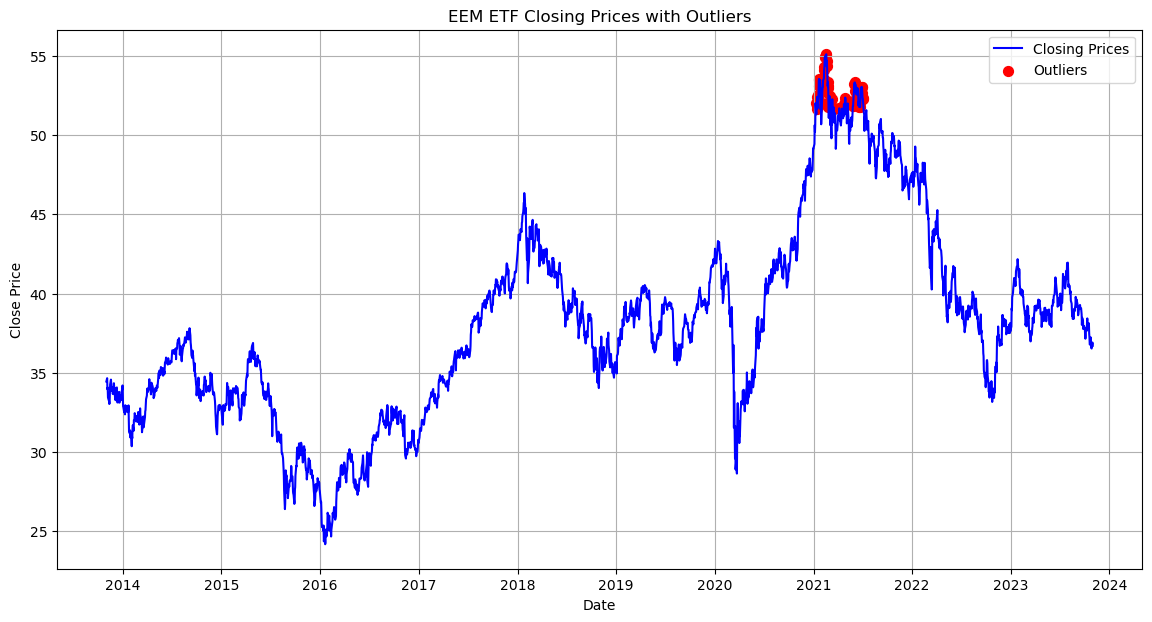

In [11]:
#Extract the EEM data
eem_data = data['EEM']

# Calculate the IQR for Close prices
Q1 = eem_data['Close'].quantile(0.25)
Q3 = eem_data['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = eem_data[(eem_data['Close'] < lower_bound) | (eem_data['Close'] > upper_bound)]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(eem_data['Date'], eem_data['Close'], label='Closing Prices', color='blue')
plt.scatter(outliers['Date'], outliers['Close'], color='red', s=50, label='Outliers')
plt.title('EEM ETF Closing Prices with Outliers')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


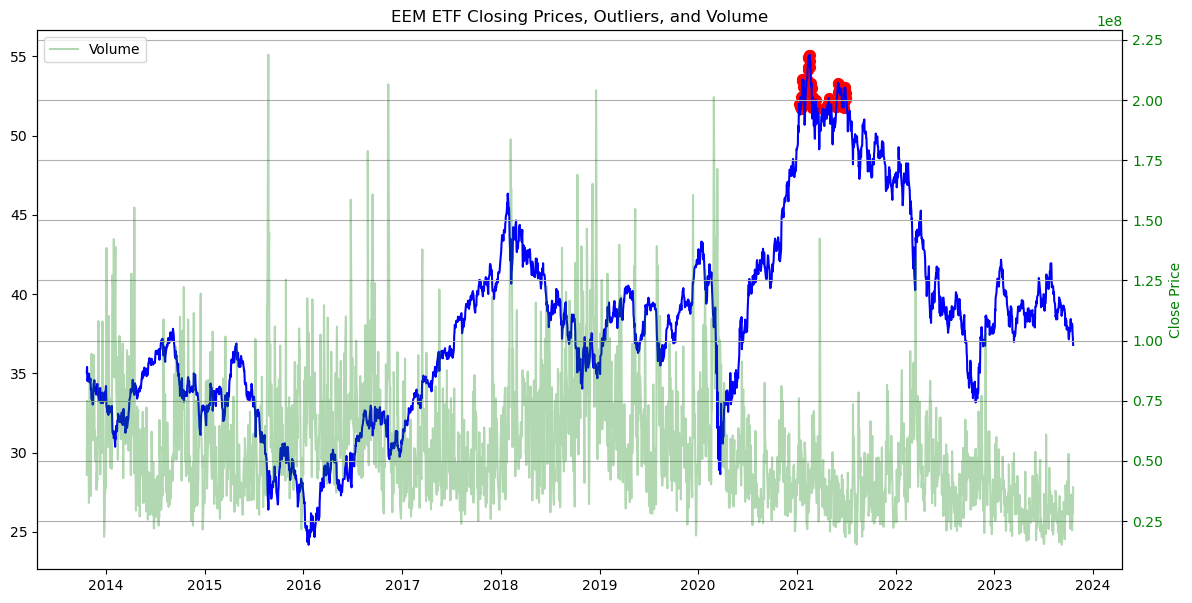

In [23]:
#For a visual check, we overlaid the volume data with the 
#closing price to see if there's any correlation:
plt.figure(figsize=(14, 7))

# Plotting closing prices
plt.plot(eem_data['Date'], eem_data['Close'], label='Closing Prices', color='blue')
plt.scatter(outliers['Date'], outliers['Close'], color='red', s=50, label='Outliers')

# Plotting volume (secondary y-axis)
ax2 = plt.gca().twinx()
ax2.plot(eem_data['Date'], eem_data['Volume'], color='green', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('EEM ETF Closing Prices, Outliers, and Volume')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

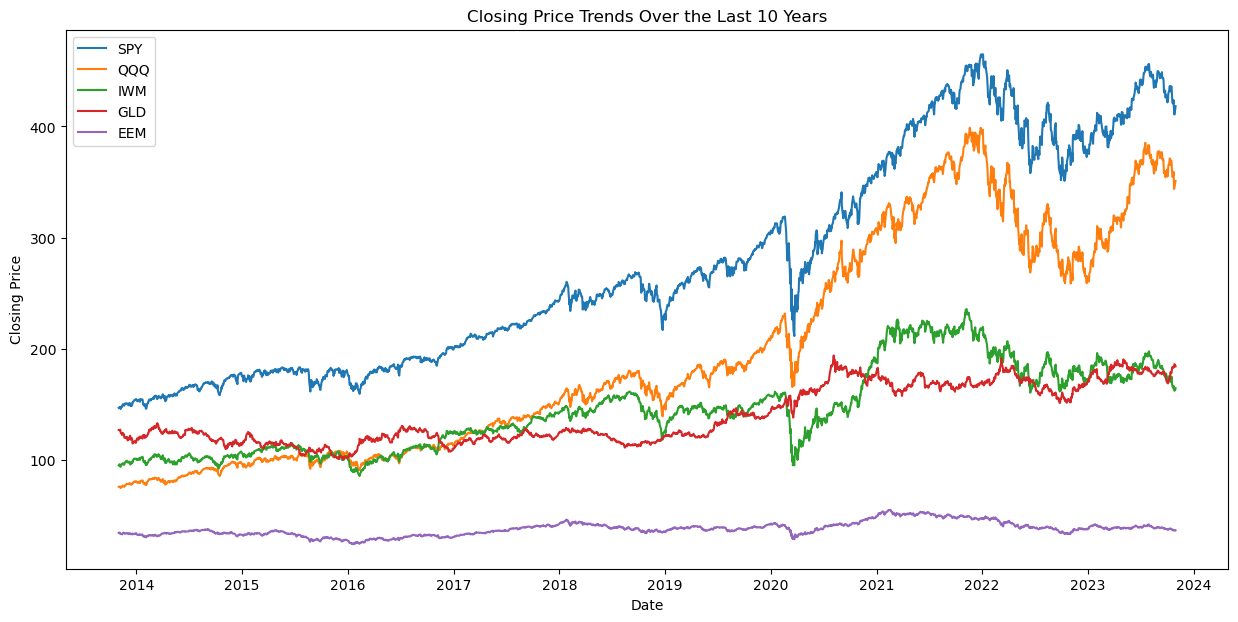

In [12]:
#Trends Over Time
plt.figure(figsize=(15, 7))
for etf, df in data.items():
    plt.plot(df['Date'], df['Close'], label=etf)
plt.title('Closing Price Trends Over the Last 10 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

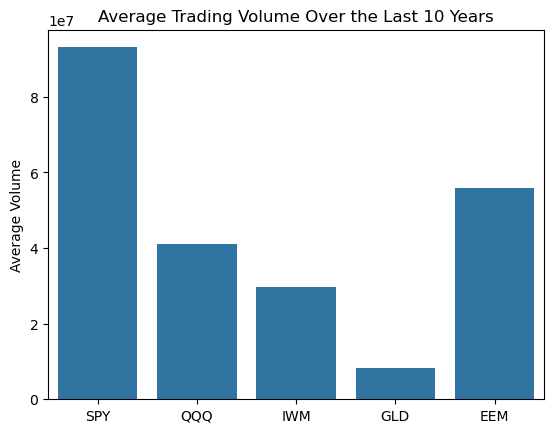

In [13]:
#Volume Analysis
avg_volumes = {etf: df['Volume'].mean() for etf, df in data.items()}
sns.barplot(x=list(avg_volumes.keys()), y=list(avg_volumes.values()))
plt.title('Average Trading Volume Over the Last 10 Years')
plt.ylabel('Average Volume')
plt.show()

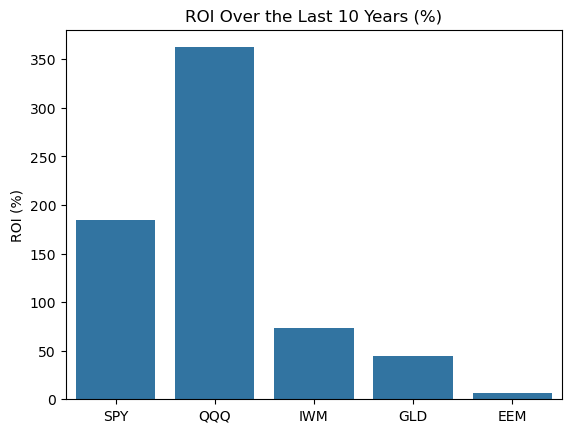

In [14]:
#Return on Investment (ROI) Over 10 Years
#The ROI is calculated as:
#ROI=((Final Value−Initial Value)/Initial Value)× 100

roi = {}
for etf, df in data.items():
    initial_value = df['Close'].iloc[0]
    final_value = df['Close'].iloc[-1]
    roi[etf] = ((final_value - initial_value) / initial_value) * 100

sns.barplot(x=list(roi.keys()), y=list(roi.values()))
plt.title('ROI Over the Last 10 Years (%)')
plt.ylabel('ROI (%)')
plt.show()


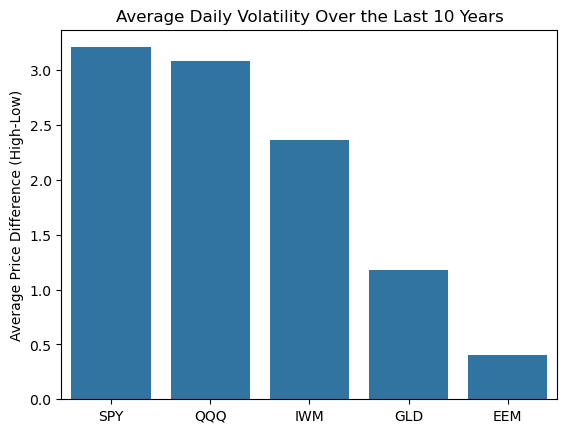

In [15]:
#Volatility Analysis Based on High-Low Price Difference
volatility = {etf: df['High'].sub(df['Low']).mean() for etf, df in data.items()}
sns.barplot(x=list(volatility.keys()), y=list(volatility.values()))
plt.title('Average Daily Volatility Over the Last 10 Years')
plt.ylabel('Average Price Difference (High-Low)')
plt.show()

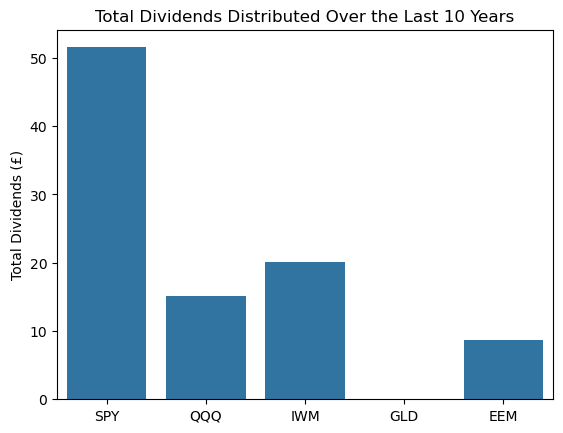

In [16]:
#Dividends Analysis
total_dividends = {etf: df['Dividends'].sum() for etf, df in data.items()}
sns.barplot(x=list(total_dividends.keys()), y=list(total_dividends.values()))
plt.title('Total Dividends Distributed Over the Last 10 Years')
plt.ylabel('Total Dividends (£)')
plt.show()

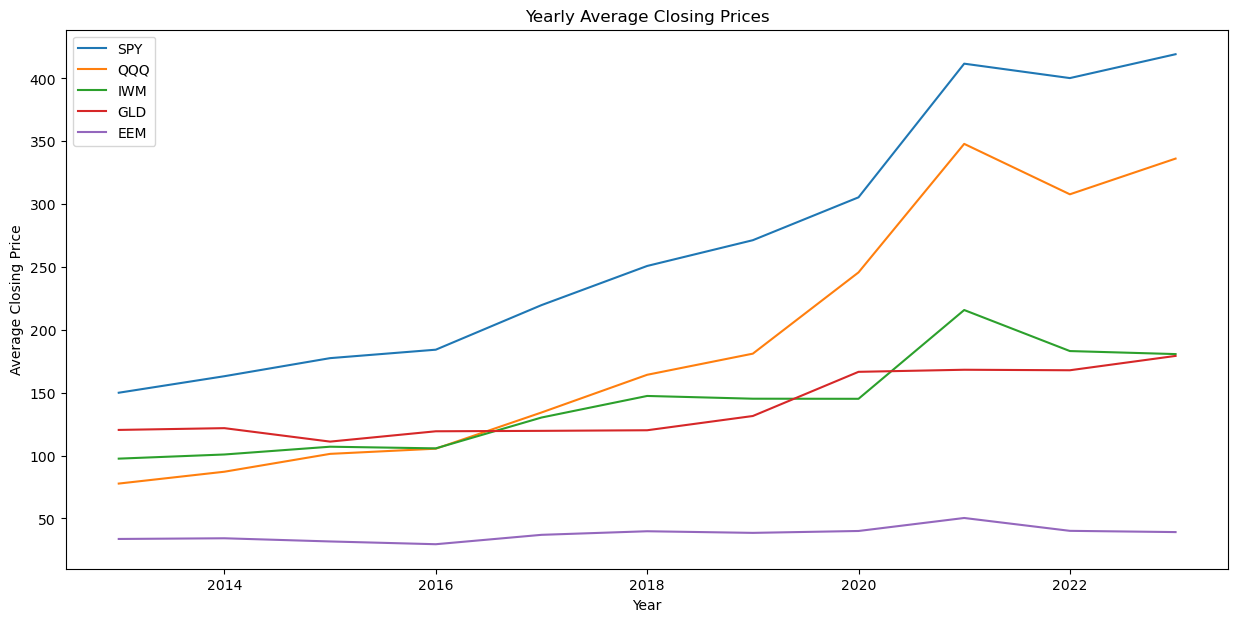

In [18]:
#Yearly Average Closing Prices
plt.figure(figsize=(15, 7))
for etf, df in data.items():
    df['Year'] = df['Date'].dt.year
    yearly_avg = df.groupby('Year')['Close'].mean()
    plt.plot(yearly_avg, label=etf)
plt.title('Yearly Average Closing Prices')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


In [17]:
#Major Drops in Closing Prices
major_drops = {}
for etf, df in data.items():
    df['Price_Drop'] = df['Close'].diff()
    min_drop_date = df['Date'][df['Price_Drop'].idxmin()]
    major_drops[etf] = min_drop_date

print("Dates of Largest Single-Day Drops:")
for etf, date in major_drops.items():
    print(f"{etf}: {date}")


Dates of Largest Single-Day Drops:
SPY: 2020-03-16 00:00:00
QQQ: 2020-03-16 00:00:00
IWM: 2020-03-16 00:00:00
GLD: 2020-08-11 00:00:00
EEM: 2020-03-16 00:00:00
